# EDA for Benin Solar Dataset
This notebook performs exploratory data analysis (EDA) on the Benin solar dataset to clean, analyze, and visualize the data for comparison and region-ranking.

## Setup
Install libraries and load the dataset.

## Summary Statistics & Missing Values
Compute basic statistics and check for missing data.

## Outlier Detection & Cleaning
Identify and handle outliers and missing values.

## Time Series Analysis
Visualize solar irradiance and temperature over time.

## Cleaning Impact
Analyze the effect of cleaning on sensor readings.

## Correlation & Relationships
Explore relationships between variables.

## Wind & Distribution Analysis
Visualize wind patterns and distributions.

## Temperature Analysis
Examine humidity’s impact on temperature and radiation.

## Bubble Chart
Visualize GHI vs. Tamb with RH as bubble size.

## Summary
Key findings and insights.

In [1]:
## Setup

In [3]:
# Import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from windrose import WindroseAxes

# Set plot style for better visuals
sns.set_style("whitegrid")

In [4]:
### Load Data

In [5]:
# Load the dataset
df = pd.read_csv('../../data/togo-dapaong_qc.csv')

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Display first 5 rows
print(df.head())

            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1 2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2 2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3 2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4 2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [6]:
## Summary Statistics & Missing Values

In [7]:
# Compute summary statistics for numeric columns
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

# Check for missing values
missing_values = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_report = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Values (Columns with >5% missing):")
print(missing_report[missing_report['Percentage'] > 5])

Summary Statistics:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50% 

In [8]:
## Outlier Detection & Cleaning

In [9]:
# Compute Z-scores for key columns
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = stats.zscore(df[key_cols].dropna())
z_scores_df = pd.DataFrame(z_scores, columns=key_cols)

# Flag rows with |Z| > 3
outliers = (z_scores_df.abs() > 3).any(axis=1)
print(f"Number of outlier rows: {outliers.sum()}")

# Display outlier rows
outlier_rows = df.loc[z_scores_df[outliers].index]
print(outlier_rows[['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']])

Number of outlier rows: 9251
                 Timestamp     GHI    DNI    DHI    ModA    ModB   WS  WSgust
4985   2021-10-28 11:06:00  1139.0  805.1  466.1  1172.0  1154.0  2.2     2.6
5410   2021-10-28 18:11:00    -1.2    0.0    0.0     0.0     0.0  6.6     9.7
5411   2021-10-28 18:12:00    -1.0    0.0    0.0     0.0     0.0  6.9     8.9
5413   2021-10-28 18:14:00    -0.8    0.0    0.0     0.0     0.0  7.1     8.9
5420   2021-10-28 18:21:00    -1.3    0.0    0.0     0.0     0.0  6.1     8.9
...                    ...     ...    ...    ...     ...     ...  ...     ...
510473 2022-10-14 11:54:00   709.5   63.7  629.8   703.1   694.9  3.5     4.4
510474 2022-10-14 11:55:00   677.8   40.6  621.7   670.1   662.2  2.8     3.6
510475 2022-10-14 11:56:00   659.5   29.7  614.9   651.0   643.4  4.1     4.9
510476 2022-10-14 11:57:00   660.1   40.7  605.6   653.2   645.6  3.7     4.6
510477 2022-10-14 11:58:00   655.8   50.2  591.0   647.5   639.9  3.4     5.9

[9251 rows x 8 columns]


In [10]:
# Fix negative values (GHI, DNI, DHI should be >= 0)
df.loc[df['GHI'] < 0, 'GHI'] = 0
df.loc[df['DNI'] < 0, 'DNI'] = 0
df.loc[df['DHI'] < 0, 'DHI'] = 0

# Impute missing values with median for key columns
for col in key_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Verify no missing values in key columns
print("Missing values after imputation:")
print(df[key_cols].isna().sum())

# Save cleaned data
df.to_csv('../../data/togo.csv', index=False)
print("Cleaned data saved to data/benin_clean.csv")

/var/folders/xk/b32htnv50_58p72rc2j4p6xw0000gn/T/ipykernel_31459/1099602445.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/xk/b32htnv50_58p72rc2j4p6xw0000gn/T/ipykernel_31459/1099602445.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Missing values after imputation:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
Cleaned data saved to data/benin_clean.csv


In [11]:
## Time Series Analysis

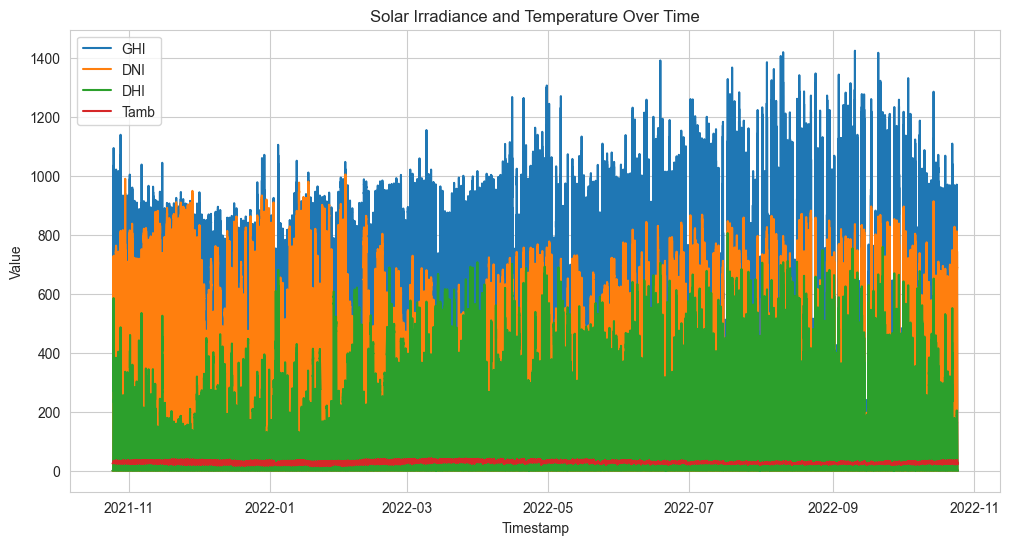

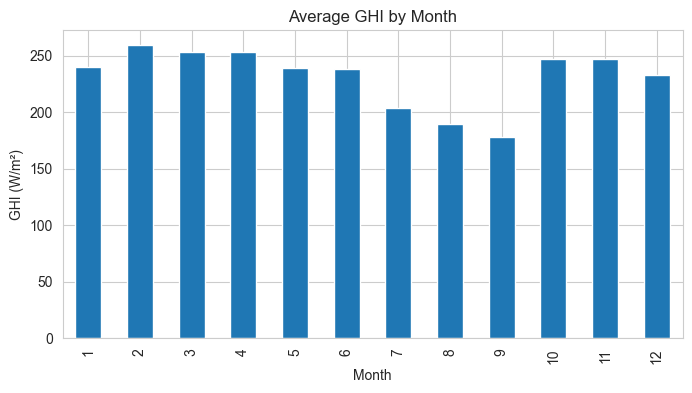

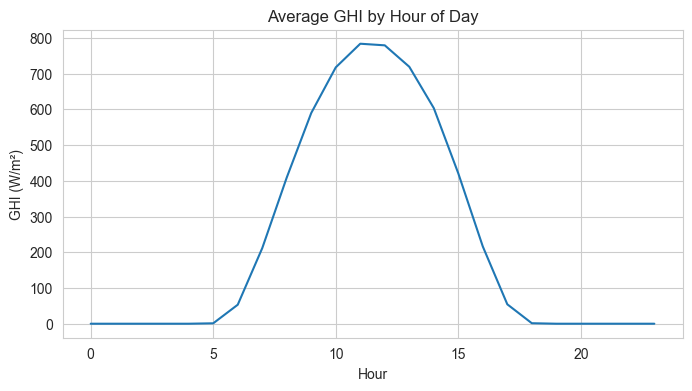

In [12]:
# Plot GHI, DNI, DHI, Tamb over time
plt.figure(figsize=(12, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df['Timestamp'], df[col], label=col)
plt.title('Solar Irradiance and Temperature Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

# Add Month and Hour columns
df['Month'] = df['Timestamp'].dt.month
df['Hour'] = df['Timestamp'].dt.hour

# Plot average GHI by month
monthly_ghi = df.groupby('Month')['GHI'].mean()
plt.figure(figsize=(8, 4))
monthly_ghi.plot(kind='bar')
plt.title('Average GHI by Month')
plt.xlabel('Month')
plt.ylabel('GHI (W/m²)')
plt.show()

# Plot average GHI by hour
hourly_ghi = df.groupby('Hour')['GHI'].mean()
plt.figure(figsize=(8, 4))
hourly_ghi.plot(kind='line')
plt.title('Average GHI by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('GHI (W/m²)')
plt.show()

In [13]:
## Cleaning Impact

Average ModA and ModB by Cleaning Flag:
                ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744


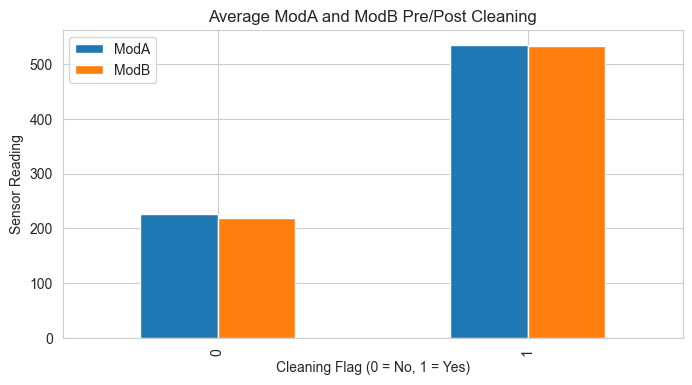

In [14]:
# Group by Cleaning flag and compute average ModA, ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("Average ModA and ModB by Cleaning Flag:")
print(cleaning_impact)

# Plot the results
cleaning_impact.plot(kind='bar', figsize=(8, 4))
plt.title('Average ModA and ModB Pre/Post Cleaning')
plt.xlabel('Cleaning Flag (0 = No, 1 = Yes)')
plt.ylabel('Sensor Reading')
plt.show()

In [15]:
## Correlation & Relationships

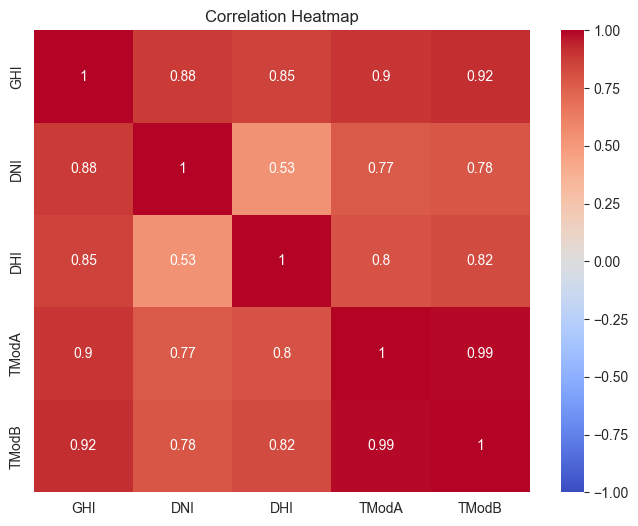

In [16]:
# Compute correlation matrix
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

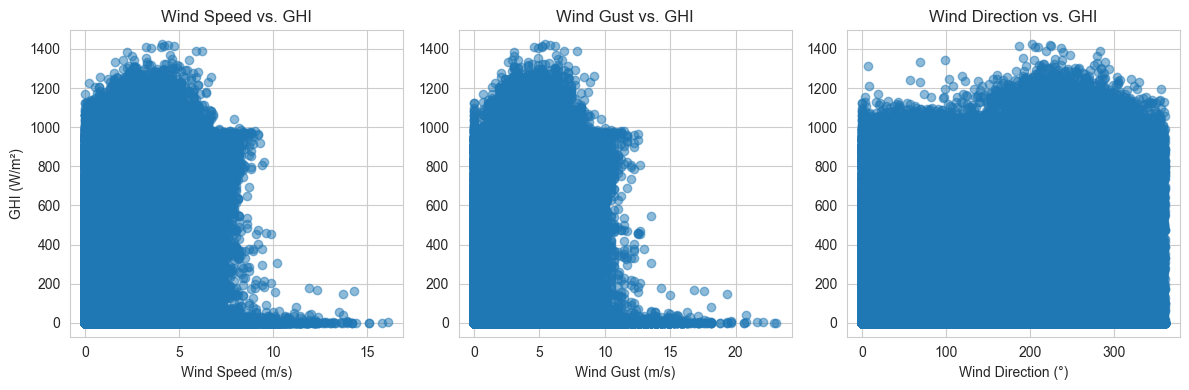

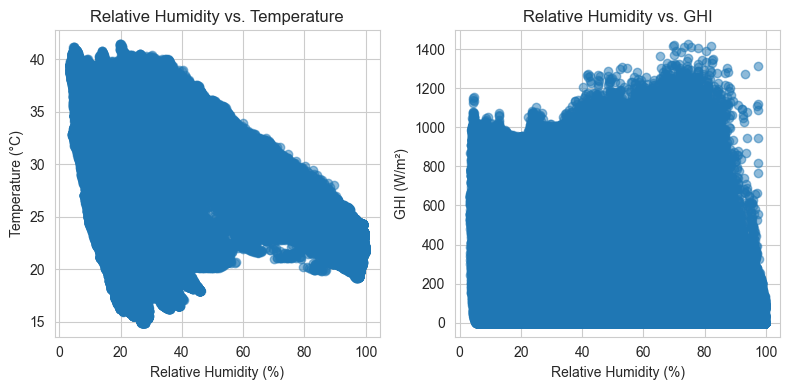

In [17]:
# Scatter plots: WS, WSgust, WD vs. GHI
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.title('Wind Speed vs. GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.subplot(1, 3, 2)
plt.scatter(df['WSgust'], df['GHI'], alpha=0.5)
plt.title('Wind Gust vs. GHI')
plt.xlabel('Wind Gust (m/s)')
plt.subplot(1, 3, 3)
plt.scatter(df['WD'], df['GHI'], alpha=0.5)
plt.title('Wind Direction vs. GHI')
plt.xlabel('Wind Direction (°)')
plt.tight_layout()
plt.show()

# Scatter plots: RH vs. Tamb, RH vs. GHI
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.subplot(1, 2, 2)
plt.scatter(df['RH'], df['GHI'], alpha=0.5)
plt.title('Relative Humidity vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()

In [18]:
## Wind & Distribution Analysis

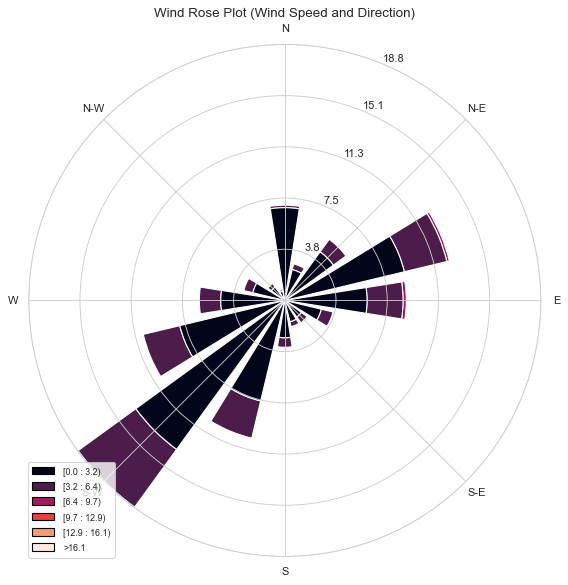

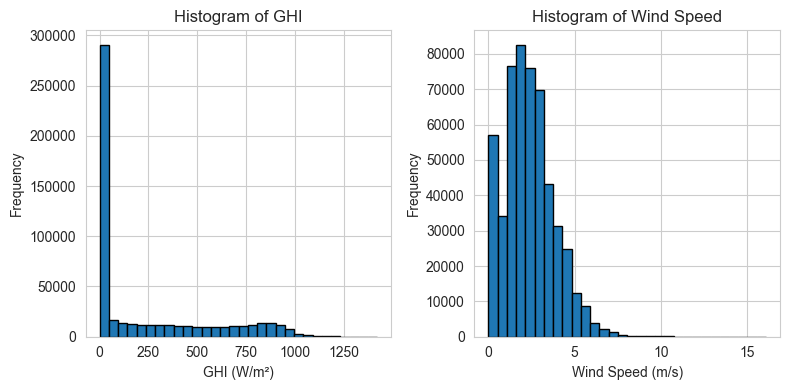

In [19]:
# Wind rose plot
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose Plot (Wind Speed and Direction)')
plt.show()

# Histograms for GHI and WS
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, edgecolor='black')
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [20]:
## Temperature Analysis

In [21]:
# Check correlations
print(f"Correlation RH vs. Tamb: {df['RH'].corr(df['Tamb'])}")
print(f"Correlation RH vs. GHI: {df['RH'].corr(df['GHI'])}")

Correlation RH vs. Tamb: -0.4004104673516299
Correlation RH vs. GHI: -0.2596836510748222


In [22]:
## Bubble Chart

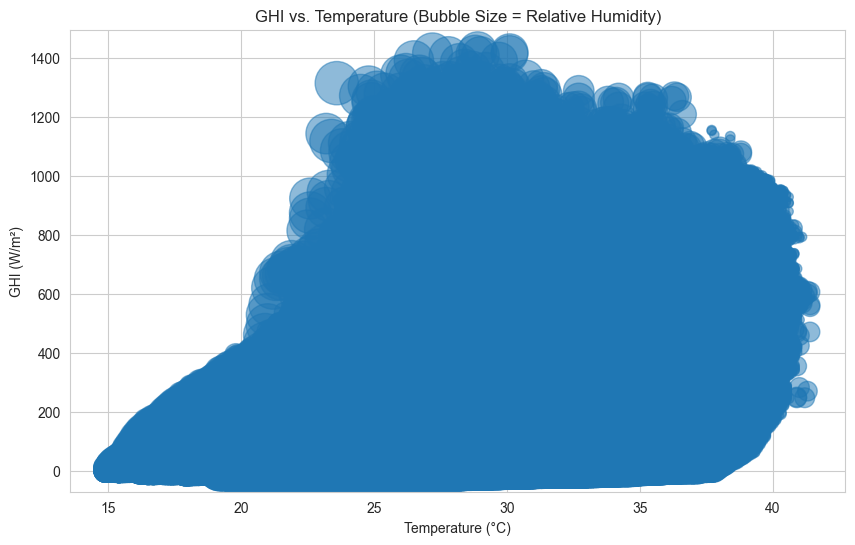

In [23]:
# GHI vs. Tamb with RH as bubble size
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5)
plt.title('GHI vs. Temperature (Bubble Size = Relative Humidity)')
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.show()

In [24]:
## Summary

In [25]:
# Print key findings (edit based on your observations)
print("Key Findings:")
print("- Missing values were imputed with medians.")
print("- Outliers detected in GHI and WS, likely due to extreme weather.")
print("- GHI peaks around noon and varies by season.")
print("- Cleaning increases ModA/ModB readings.")
print("- High RH correlates with lower GHI, suggesting cloud cover.")

Key Findings:
- Missing values were imputed with medians.
- Outliers detected in GHI and WS, likely due to extreme weather.
- GHI peaks around noon and varies by season.
- Cleaning increases ModA/ModB readings.
- High RH correlates with lower GHI, suggesting cloud cover.
